In [1]:
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
# https://matplotlib.org/tutorials/introductory/customizing.html
plt.style.use('/Users/dcoe/p/matplotlibrc.txt')
#plt.style.use('https://www.stsci.edu/~dcoe/p/matplotlibrc.txt')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import matplotlib.ticker as ticker

In [2]:
import datetime
from datetime import date
import matplotlib.dates as mdates

In [3]:
import numpy as np
#import glob
import os
home = os.environ['HOME']

In [4]:
from astropy.io import ascii
import astropy.units as u

In [5]:
#observation_dates = '2016-06-07 2016-07-17 2019-11-04 2019-11-27 2021-10-01 2021-11-01 2022-07-20 2022-08-20 2022-08-23 2022-12-02'.split()
#observation_dates = '2016-06-07 2016-07-17 2019-11-04 2019-11-27 2021-10-01 2022-02-01 2022-06-02 2022-09-30 2022-08-23 2022-12-02'.split()
# HST:
observation_dates = '2016-06-07 2016-07-17 2019-11-04 2019-11-27 2021-11-28 2022-01-29 2022-10-29 2023-02-06'.split()

observation_dates = [date.fromisoformat(obs_date) for obs_date in observation_dates]
dates = observation_dates[2:-2]
observation_dates

[datetime.date(2016, 6, 7),
 datetime.date(2016, 7, 17),
 datetime.date(2019, 11, 4),
 datetime.date(2019, 11, 27),
 datetime.date(2021, 11, 28),
 datetime.date(2022, 1, 29),
 datetime.date(2022, 10, 29),
 datetime.date(2023, 2, 6)]

In [6]:
Earendel_fluxes = [45.21661895, 51.3048873,  62.43535781, 59.17036239]
Earendel_fluxerrs = [3.76766,    4.06076644, 4.07810642, 4.8634706 ]

clump1a_fluxes = [67.79173834, 81.11566709, 88.59790668, 76.33963719]
clump1a_fluxerrs = [3.8712228,  4.16029647, 4.17208793, 4.94558371]
clump1b_fluxes = [95.00377182, 88.43721493, 99.20283394, 86.32766947]
clump1b_fluxerrs = [3.92780899, 4.18693012, 4.26645827, 5.03300083]

In [7]:
# Format exponential ticks to read as simple numbers unless too big / small
def fmtexp(x, pos):
    if between(1e-4, x, 1e4):
        s = '%g' % x
    else:
        p = int(np.log10(x))
        d = int(np.round(x / 10**p))
        #print d
        s = ''
        if d > 1:
            s += '%d$\\times$' % d
    
        s += '10${\\mathdefault{^{%d}}}$' % p
    return s

# Conversions for second axis
def AB2uJy(mAB):
    m = mAB * u.ABmag
    f = m.to(u.uJy)
    return f.value

def uJy2AB(F_uJy):
    f = F_uJy * u.uJy
    m = f.to(u.ABmag)
    return m.value

def AB2nJy(mAB):
    m = mAB * u.ABmag
    f = m.to(u.nJy)
    return f.value

def nJy2AB(F_nJy):
    f = F_nJy * u.nJy
    m = f.to(u.ABmag)
    return m.value

<IPython.core.display.Javascript object>


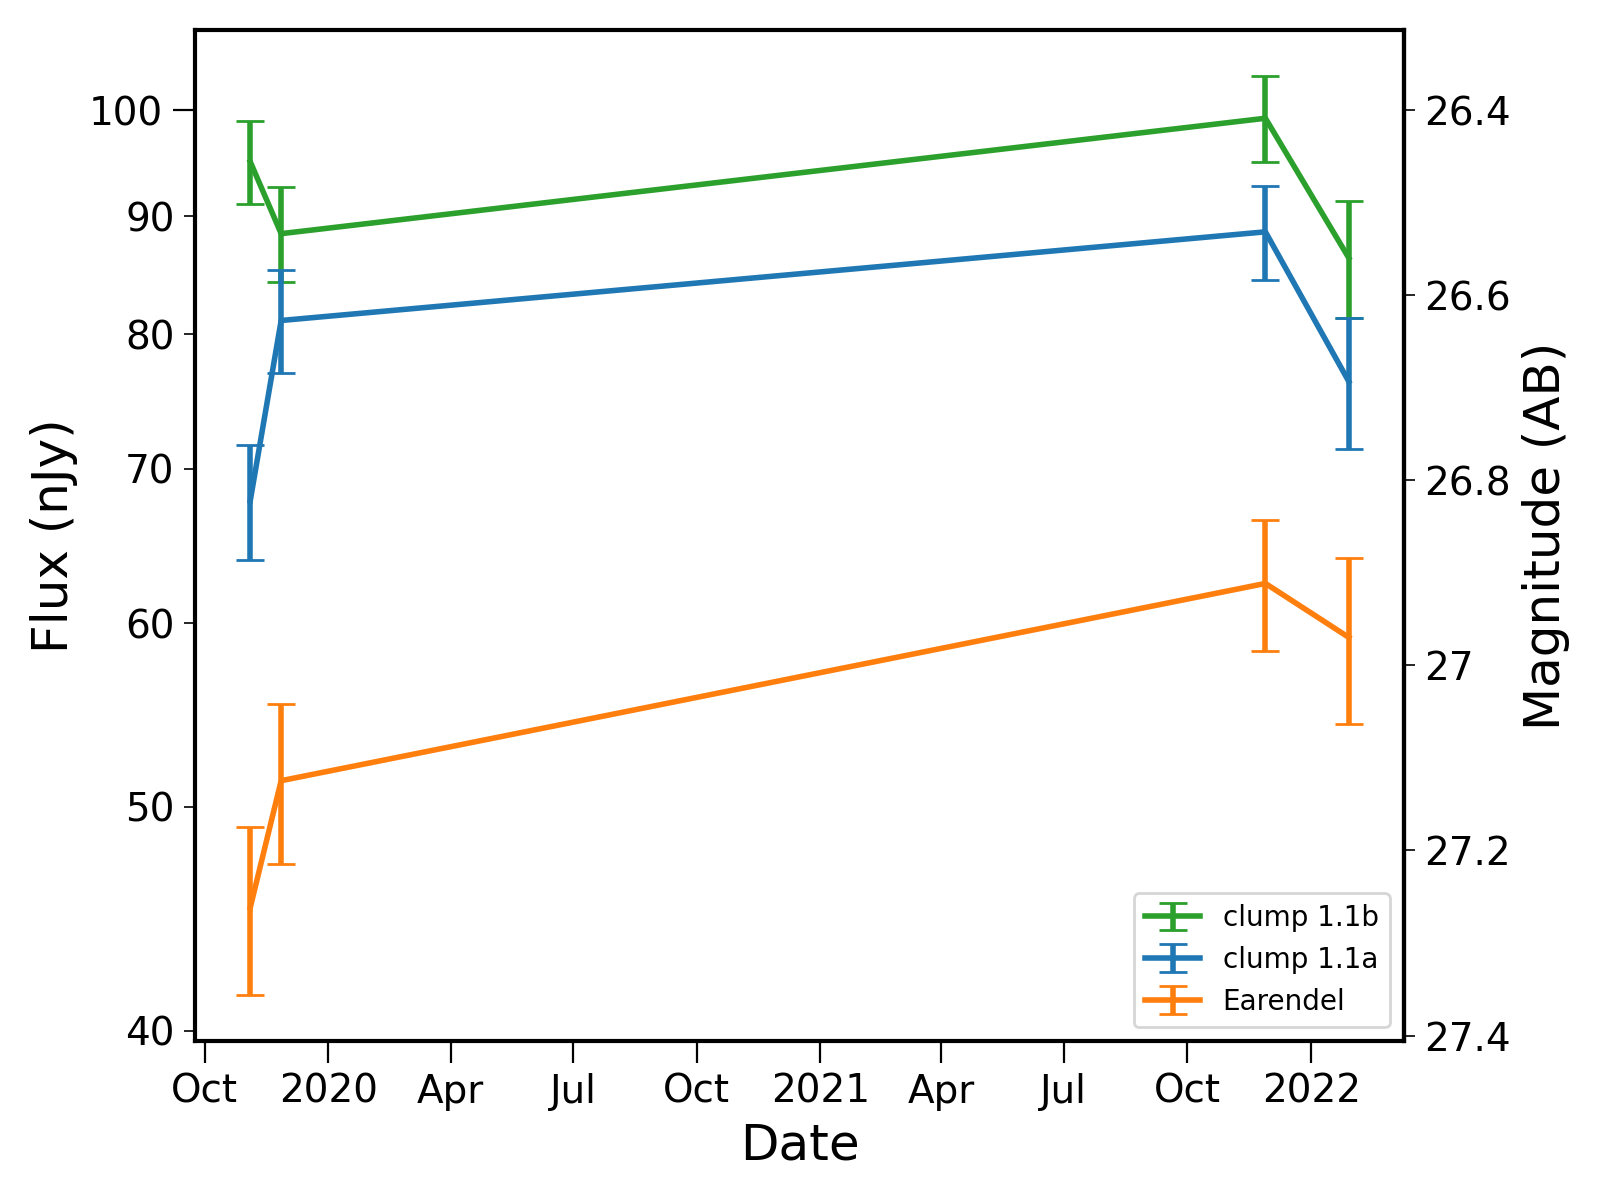

In [8]:
def plot_fluxes(fluxes, fluxerrs, color='C0', label=None, ls='-', alpha=1):
    plt.errorbar(dates, fluxes, fluxerrs, capsize=5, ls=ls, color=color, label=label, alpha=alpha)
    #factors = 1 / np.array(clump1a_fluxes) # / np.array(fluxes)
    #plt.errorbar(dates, factors * fluxes, factors * fluxerrs, capsize=5, ls=ls, color=color, label=label, alpha=alpha)    

fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # , sharex=True, sharey=True)

plot_fluxes(clump1b_fluxes,  clump1b_fluxerrs,  'C2', 'clump 1.1b')
plot_fluxes(clump1a_fluxes,  clump1a_fluxerrs,  'C0', 'clump 1.1a')
plot_fluxes(Earendel_fluxes, Earendel_fluxerrs, 'C1', 'Earendel')

plt.semilogy()

plt.xlabel('Date')
plt.ylabel('Flux (nJy)')
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

#ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmtexp))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))

secax = ax.secondary_yaxis('right', functions=(nJy2AB, AB2nJy))
#secax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
secax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
secax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))
secax.set_ylabel('Magnitude (AB)')

plt.legend()
#plt.savefig('Earendel_HST_monitoring.pdf')

In [9]:
reference_fluxes = np.mean([np.array(clump1a_fluxes), np.array(clump1b_fluxes)], axis=0)
reference_fluxes

array([81.39775508, 84.77644101, 93.90037031, 81.33365333])

<IPython.core.display.Javascript object>


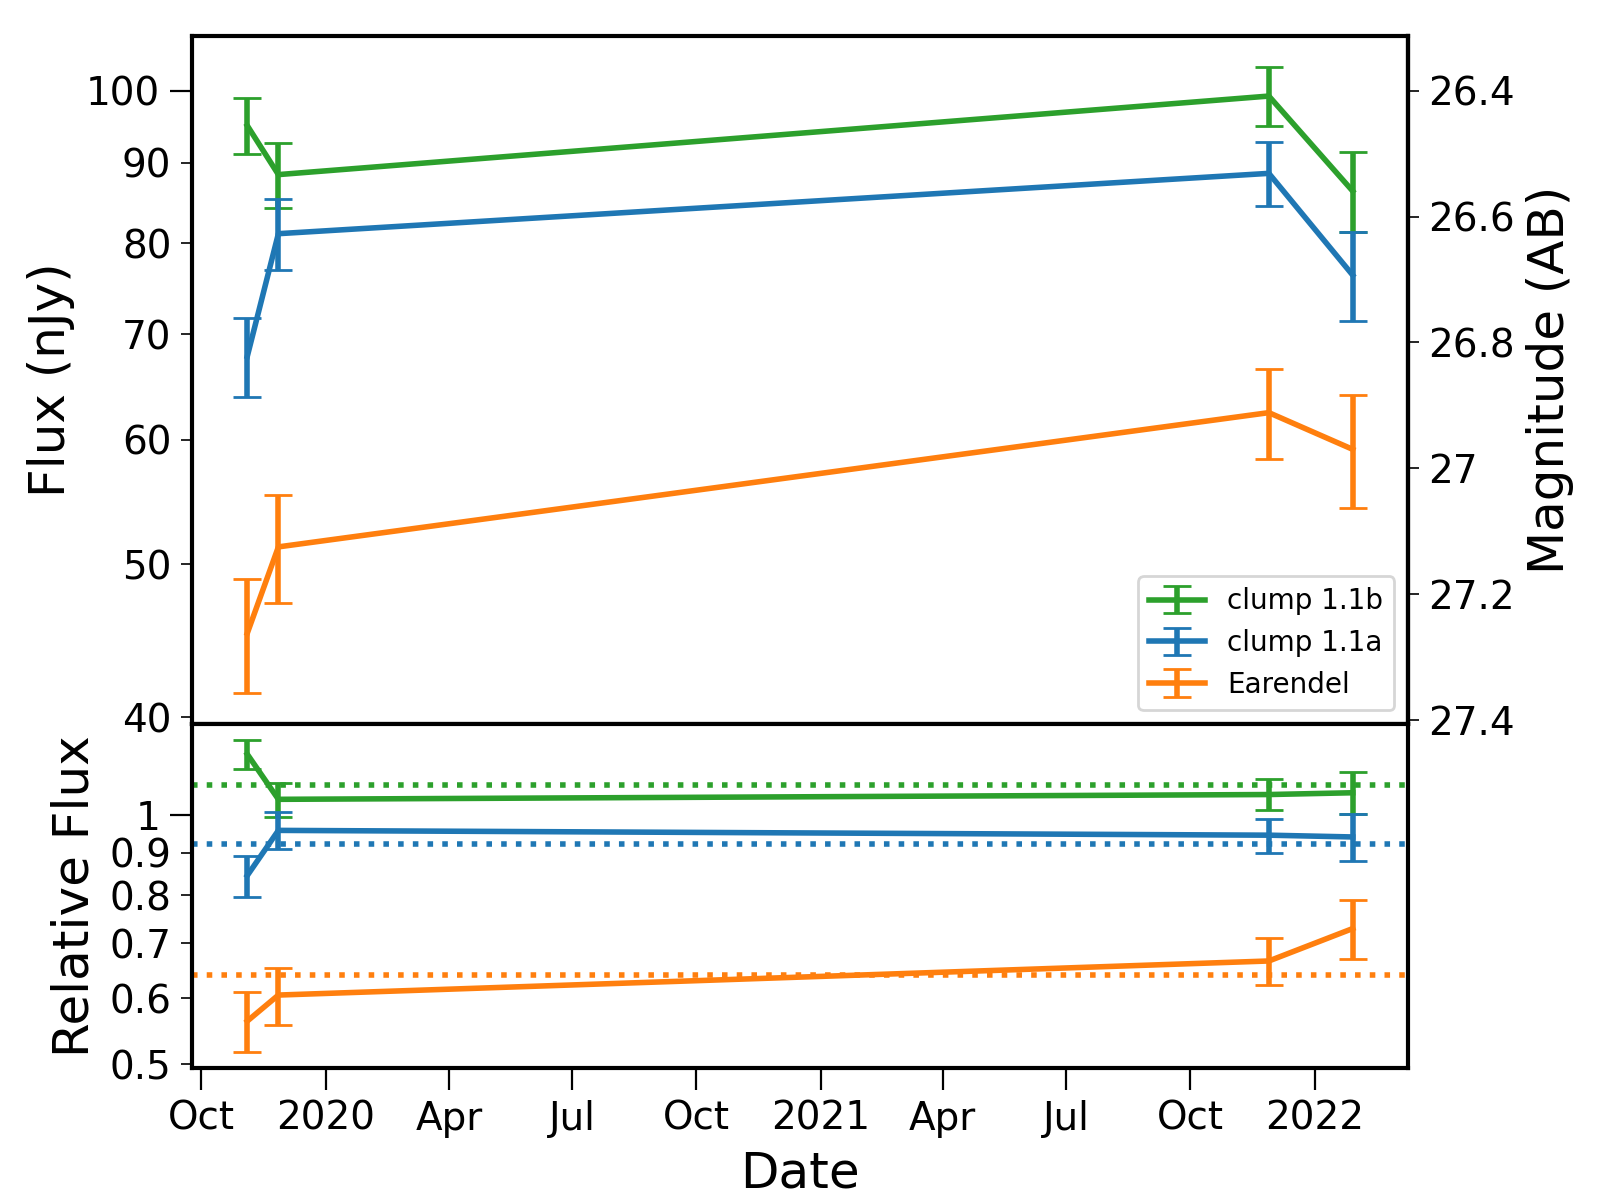

In [10]:
def plot_fluxes(fluxes, fluxerrs, color='C0', label=None, ls='-', alpha=1, normalize=False, plot_hline=True):
    if normalize:
        #reference_fluxes = np.mean([np.array(clump1a_fluxes), np.array(clump1b_fluxes)], axis=0)
        reference_fluxes = np.sqrt(np.array(clump1a_fluxes) * np.array(clump1b_fluxes))
        #reference_fluxes = np.array(clump1a_fluxes)
        factors = 1 / reference_fluxes
        ax.errorbar(dates, factors * fluxes, factors * fluxerrs, capsize=5, ls=ls, color=color, label=label, alpha=alpha)    
        if plot_hline:
            ax.axhline(np.mean(factors * fluxes), color=color, ls=':')
    else:
        ax.errorbar(dates, fluxes, fluxerrs, capsize=5, ls=ls, color=color, label=label, alpha=alpha)

fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [2,1]}, tight_layout=False) #, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

ax = axs[0]  # top plot
plot_fluxes(clump1b_fluxes,  clump1b_fluxerrs,  'C2', 'clump 1.1b')
plot_fluxes(clump1a_fluxes,  clump1a_fluxerrs,  'C0', 'clump 1.1a')
plot_fluxes(Earendel_fluxes, Earendel_fluxerrs, 'C1', 'Earendel')

ax.semilogy()

ax.set_xlabel('Date')
ax.set_ylabel('Flux (nJy)')
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

#ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmtexp))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))
ax.legend()

secax = ax.secondary_yaxis('right', functions=(nJy2AB, AB2nJy))
#secax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
secax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
secax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))
secax.set_ylabel('Magnitude (AB)')

# Plot normalized ratios
ax = axs[1]  # bottom plot
#ax.axhline(1, c='k', ls='--', lw=1)
plot_fluxes(clump1b_fluxes,  clump1b_fluxerrs,  'C2', 'clump 1.1b', normalize=True)
plot_fluxes(clump1a_fluxes,  clump1a_fluxerrs,  'C0', 'clump 1.1a', normalize=True)
plot_fluxes(Earendel_fluxes, Earendel_fluxerrs, 'C1', 'Earendel', normalize=True)
ax.semilogy()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))
ax.set_ylabel('Relative Flux')

fig.subplots_adjust(top=0.97, left=0.12, right=0.88)
plt.xlabel('Date')

plt.savefig('HST_monitoring.pdf')